# Module 5: Object Detection with YOLO - The State of the Art

## Welcome to Module 5!

In our last module, we built a CNN that could tell us *what* was in an image (e.g., "This is a T-shirt"). But what if there are multiple objects? And what if we need to know *where* they are?

**Our Story for this Module:** We will take the next major leap in computer vision from **Classification** to **Object Detection**. We will learn about the revolutionary **YOLO (You Only Look Once)** family of models. Instead of building from scratch, we will use a powerful, pre-trained, state-of-the-art YOLOv8 model to detect, classify, and locate multiple objects in real-world images and videos, demonstrating the incredible power of modern deep learning.

### **Setup: Installing the `ultralytics` Library**

We will use the `ultralytics` library, which provides a simple, powerful Python interface for the latest YOLO models.

In [2]:
%pip install -q ultralytics 

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

print("Libraries imported successfully!")

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Uditya\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Libraries imported successfully!


---

## **Part 1: The Concept - What is Object Detection?**

Object detection is a more advanced task than image classification.

- **Image Classification:** Assigns a single label to an entire image. Answers the question: "What is in this picture?"
- **Object Detection:** Identifies multiple objects in an image and draws a **bounding box** around each one, along with a class label and a confidence score. It answers the questions: "What objects are in this picture, where are they, and how confident am I?"

### **YOLO: You Only Look Once**

YOLO is a family of models that revolutionized object detection. Before YOLO, models would look at many different regions of an image separately, which was very slow.

The key innovation of YOLO was to look at the entire image **just once** and predict all bounding boxes and class probabilities simultaneously. This makes it incredibly fast and suitable for real-time applications like self-driving cars and video analytics.

---

## **Part 2: Inference with a Pre-trained YOLOv8 Model**

Training an object detection model from scratch can take days or even weeks on powerful GPUs. Instead, we will leverage **transfer learning** by using a YOLOv8 model that has already been pre-trained on the massive COCO dataset, which contains 80 common object classes (like person, car, dog, etc.).

### **2.1 Loading the Model**

With the `ultralytics` library, loading a pre-trained model is as simple as a single line of code. We'll use `yolov8n.pt`, which is the smallest and fastest YOLOv8 model ('n' stands for nano).

In [4]:
# Load a pre-trained YOLOv8n model
print("Loading YOLOv8n model... This will download weights the first time.")
model = YOLO('yolov8n.pt')
print("Model loaded successfully!")

Loading YOLOv8n model... This will download weights the first time.
Model loaded successfully!


### **2.2 Running Inference on an Image**

Now for the "wow" moment. Let's pass an image of a busy street scene to our model and see what it finds. The `model()` call handles all the complex pre-processing and post-processing for us.

Running inference on '../assets/traffic.jpg'...

image 1/1 c:\Users\Uditya\Documents\GitHub\Computer Vision\Module 5\..\assets\traffic.jpg: 640x448 1 person, 8 cars, 1 bus, 1 traffic light, 1 backpack, 1 handbag, 267.4ms
Speed: 15.7ms preprocess, 267.4ms inference, 9.9ms postprocess per image at shape (1, 3, 640, 448)
Inference complete. Displaying results...


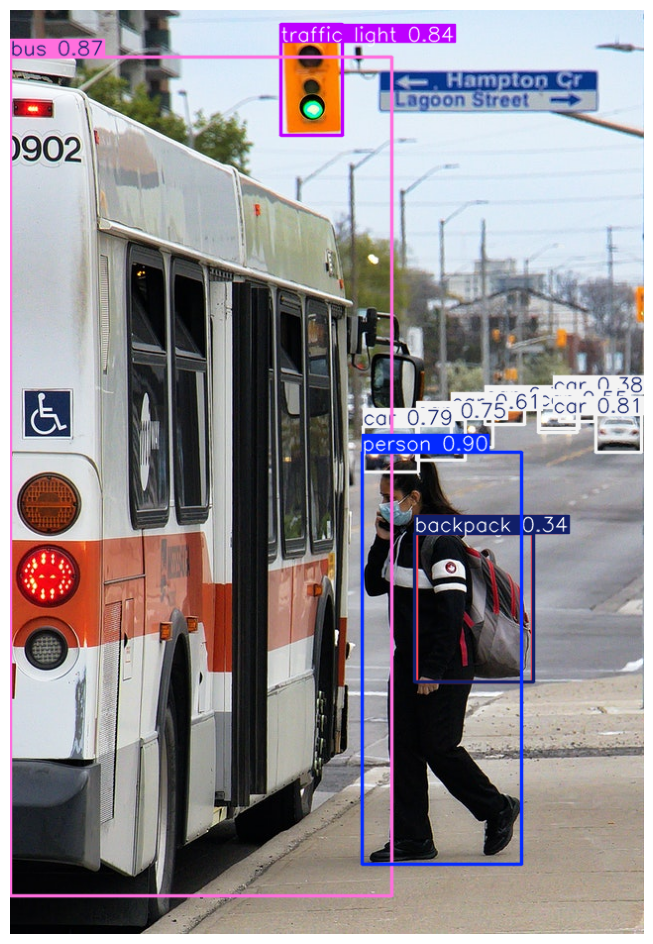

In [5]:
image_path = '../assets/traffic.jpg'
print(f"Running inference on '{image_path}'...")

# Run inference on the image
results = model(image_path)

# The 'results' object contains all the detection information.
# We can easily plot the results with bounding boxes.
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of results
    im = Image.fromarray(im_array[..., ::-1])  # Convert BGR to RGB

print("Inference complete. Displaying results...")
plt.figure(figsize=(12, 12))
plt.imshow(im)
plt.axis('off')
plt.show()

#### **Analysis:**

Incredible! In just a few seconds, the model has correctly identified and located multiple cars, people, and even a traffic light, each with a bounding box, a label, and a confidence score.

### ⭐ You Try It! - Detect Objects in Your Own Image

Now it's your turn. In the cell below, **upload your own image** containing objects that the model might recognize (people, cars, animals, sports equipment, food, etc.). Then, run the inference code on your image.

In [7]:
!pip install google

Using cached google-3.0.0-py2.py3-none-any.whl (45 kB)

   ---------------------------------------- 0/3 [soupsieve]
   ---------------------------------------- 0/3 [soupsieve]
   ---------------------------------------- 0/3 [soupsieve]
   ---------------------------------------- 0/3 [soupsieve]
   ------------- -------------------------- 1/3 [beautifulsoup4]
   ------------- -------------------------- 1/3 [beautifulsoup4]
   ------------- -------------------------- 1/3 [beautifulsoup4]
   ------------- -------------------------- 1/3 [beautifulsoup4]
   ------------- -------------------------- 1/3 [beautifulsoup4]
   -------------------------- ------------- 2/3 [google]
   ---------------------------------------- 3/3 [google]



In [8]:
from google.colab import files

print("Please upload your own image file.")
uploaded = files.upload()

if not uploaded:
    print("\nNo file uploaded. Please run the cell again to try.")
else:
    my_image_path = list(uploaded.keys())[0]
    print(f"\nFile '{my_image_path}' uploaded. Ready for inference.")

ModuleNotFoundError: No module named 'google'

In [ ]:
# YOUR CODE HERE: Make sure you've uploaded a file in the cell above!
if 'my_image_path' in locals():
    print(f"Running inference on your image: '{my_image_path}'...")
    my_results = model(my_image_path)

    for r in my_results:
        im_array = r.plot()
        im = Image.fromarray(im_array[..., ::-1])

    print("Inference complete on your image!")
    plt.figure(figsize=(12, 12))
    plt.imshow(im)
    plt.axis('off')
    plt.show()
else:
    print("Please run the cell above to upload an image first.")

---

## **Part 3: Real-Time Object Detection in Videos**

Because YOLO is so fast, we can apply it to each frame of a video to perform real-time object detection.

The process is simple: we'll loop through each frame of a video, run our `model()` on it, and display the resulting frame with bounding boxes. Let's try this on a video of traffic.

In [9]:
# This cell is for running on a local machine with a display.
# It will not display video output directly in Colab, but it processes the video.
video_path = '../assets/Social-distance.mp4'
output_path = 'output.mp4'

cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print(f"Error: Could not open video file {video_path}")
else:
    print("Processing video... This may take a few minutes.")
    # Get video properties for the writer
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v') # Or 'XVID' for .avi
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Run YOLOv8 inference on the frame
        results = model(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Write the annotated frame to the output file
        out.write(annotated_frame)

    # Release everything if job is finished
    cap.release()
    out.release()
    print(f"Video processing complete. Output saved to '{output_path}'")

    # To view the video in Colab, you can use the files.download function
    from google.colab import files
    # files.download(output_path) # Uncomment to download the video

Processing video... This may take a few minutes.

0: 384x640 2 persons, 1 potted plant, 227.7ms
Speed: 33.0ms preprocess, 227.7ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 potted plant, 320.4ms
Speed: 6.1ms preprocess, 320.4ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 potted plant, 519.3ms
Speed: 18.7ms preprocess, 519.3ms inference, 7.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 potted plant, 381.5ms
Speed: 9.1ms preprocess, 381.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 potted plant, 344.0ms
Speed: 11.3ms preprocess, 344.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 potted plant, 269.2ms
Speed: 8.4ms preprocess, 269.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 potted plant, 169.8ms
Speed: 4.6ms preprocess, 169.8m

ModuleNotFoundError: No module named 'google'

In [ ]:
from IPython.display import HTML
from base64 import b64encode

# Try to play the video in Colab
try:
    mp4 = open(output_path, 'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    display(HTML(f'<video width=600 controls><source src="{data_url}" type="video/mp4"></video>'))
    print("\nVideo displayed successfully.")
except Exception as e:
    print(f"\nCould not display video in Colab: {e}")
    print(f"You can download the video using the code below:")
    from google.colab import files
    files.download(output_path)

### ⭐ You Try It! - your own video

Pre-trained models, such as those provided by Ultralytics, are often trained on large, general-purpose datasets like COCO (Common Objects in Context). This allows them to detect a diverse set of common objects, including:
People and vehicles: pedestrians, cars, trucks, bicycles, motorcycles, buses.
Animals: cats, dogs, birds, horses, sheep, cows, elephants, bears, zebras, giraffes.
Household items: chairs, tables, couches, televisions, laptops, keyboards, cell phones, books, clocks, vases, bowls, cups.
Food items: apples, oranges, bananas, pizzas, hot dogs, cakes.
Sports equipment: sports balls, bats, gloves, skis, snowboards.


In [ ]:
# please write a code to process your own video file

## **Conclusion**

Congratulations! You've just used a state-of-the-art deep learning model to perform a complex computer vision task.

We've learned:
1.  The difference between **Image Classification** and **Object Detection**.
2.  The core idea behind the **YOLO** family of models that makes them so fast and effective.
3.  How to use the `ultralytics` library to load a pre-trained **YOLOv8** model and run inference on both images and videos with just a few lines of code.

This module demonstrates the power of transfer learning and the incredible capabilities of modern, pre-trained models. While training these models is a massive undertaking, using them is becoming easier and more accessible every day.

**In our next module,** we'll explore another exciting, high-level application: using **MediaPipe** for real-time human pose and landmark detection.